# Oppgave 5

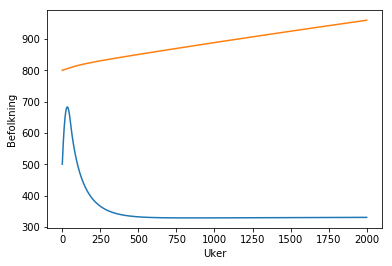

In [54]:
from pylab import*
#Tid og steg

N = 10000    #Antall ganger løkka skal kjøre
tid = 2000 #Antall tid i uker
dt = tid/N    #Antall uker pr gang løkka kjører


#Konstanter

a = 0.02 #Fødselrate
b = 1200 #Bæereevnen
d =  0.017 #Dødsrate
p = 0.269 #Innvandringsendringskonstanten
g = 0 #Antall mennesker drept av zombier hver måned
f = 0.4 #Prosent av mennekser drept som blir til zombier
h = 0.5 #Zombiemøtedrapskonstanten
t0 = 0 #Startstid
c0 = 500 #Befolkningen til å starte med
z0 = 800 #Antall zombier til å starte med


#Matriser

c = zeros(N)   #Matrise for befolkningen
cder = zeros(N)  #Matrise for endring i befolkningen
t = zeros(N)    #Matrise for tid
z = zeros(N)    #Matrise for antall zombier

#Initialbetingelser 

c[0] = c0
t[0] = t0
z[0] = z0 


#Eulers Metode

for i in range(N-1):
    if t[i]<52:
        u = 15-(t[i]*p) #Invandring
    else: 
        u = 1
    g = (c[i]/z[i])*h  #Formel for antall mennesker drept
    if c[i] < b:
        cder[i] = (a*c[i])*(1-(c[i]/b))+u - d*c[i] - g
    else:   
        cder[i] = (a*c[i])*(1-(c[i]/b)) - d*c[i] - g
    c[i+1] = c[i] + cder[i]*dt
    z[i+1] = z[i] + g*f*dt
    t[i+1] = t[i]+dt
    
#Plotting

plot(t,c)
plot(t,z)
xlabel("Uker")
ylabel("Befolkning")
show()

Vi har her lagt inn muligheten for at menneskene som blir drept av zombier blir til mennesker. Vi har satt formelen for antall drept til (z[i]/c[i]) * h. Dette ble funnet ved hjelp av algebra, ved at vi så for oss et scenario med 1 zombie og 100 mennesker, der vi ønsket to mennesker drept av denne på en uke. Vi prøvde oss så litt fram, og fant ut at denne formen passet bra. Vi må til senere tilfeller være oppmerksommme på at hvis zombiene blir utryddet, trenger vi en spesifikk kode til dette, men siden zombiene enda ikke kan dø, kan vi ta denne problematikken senere. Denne konstanten er lagt inn i løkka, slik at den oppdateres for hver gang. 

For å gjøre om fra at zombier bare dreper til at mennesker kan bli til zombier må vi bare gjennom noen få steg. Vi må først legge inn en konstant som sier noe om hvor mange prosent av de som blir drept som blir til Zombier selv, og dette satte vi til 40%, fordi zombiene også kan rive menneskene i stykker slik at de ikke kan bli til mennesker, eller mennesker kan ta livet av slektninger eller venner før de rekker å bli smittet hvis de blir bitt. Vi har her valgt å se over en veldig lang tid, for bedre å vise hvordan utviklingen vil bli. Vi ser her at menneskene stiger til en punkt hvor innvandringen blir så liten at zombiene tar over, for så å gå ned og stabilisere seg. Siden zombiene ikke kan dø i denne modellen, ser vi en økningn gjennom hele modellen. Vi ser en begrensning meg dette, som vil fikses i den neste oppgaven. 

